# The Annulus Methods

## My Annulus Method

In [1]:
import numpy as np

import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

def punch_annulus(base, inner_radius, outer_radius, centre=False):
        if not centre:
            centre = (len(base[0])/2, len(base)/2)
        
        for y in range(len(base)):
            for x in range(len(base[y])):
                if inner_radius ** 2 < ((x-centre[0]) ** 2 + (y-centre[1]) ** 2) < outer_radius ** 2:
                    base[y][x] = 1
    
        return base

def punch_annulus_kernel(base, inner_radius, outer_radius, centre=False):
        base = base
        base = punch_annulus(base, inner_radius, outer_radius, centre)
        base = base / np.sum(base)
        return base

from collation import collator
from plotting import honours_plot as hplt
import matplotlib.pyplot as plt

from copy import deepcopy

collated_data = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


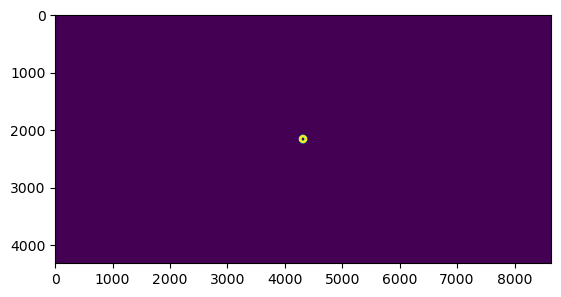

1.0


In [19]:
base = (collated_data["interpolation"]["interpolation"].data * 0)

dpp = len(base)/180
size_params = (1, np.pi)

base = punch_annulus_kernel(base, dpp*size_params[0], dpp*size_params[1])

plt.imshow(base)
plt.show()

print(np.sum(base))

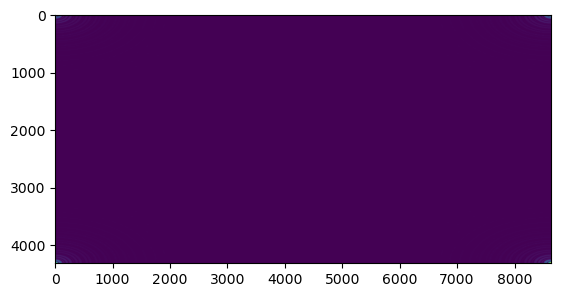

In [20]:
from foreground import foreground_remover as fr

sinc = fr.get_k_space(base)

plt.imshow(np.log(np.abs(sinc.real)+1))
plt.show()

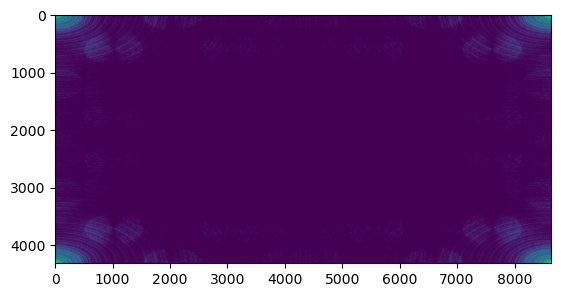

In [21]:
annulus_k_space = collated_data["interpolation"]["k-space"] * sinc

plt.imshow(np.log(np.abs(annulus_k_space.real)+1))
plt.show()

In [22]:
def swap_space(b):
    y = len(b)
    x = len(b[0])
    nd = deepcopy(b)

    for i in range(y):
        for j in range(x):
            nd[i][j] = b[int((i + int(y)/2) % y)][j]
    
    nd2 = deepcopy(nd)

    for i in range(y):
        for j in range(x):
            nd2[i][j] = nd[i][int((j + int(x)/2) % x)]

    return nd2

In [28]:
corrected_annulus = swap_space(fr.get_corrected_image(annulus_k_space).real)

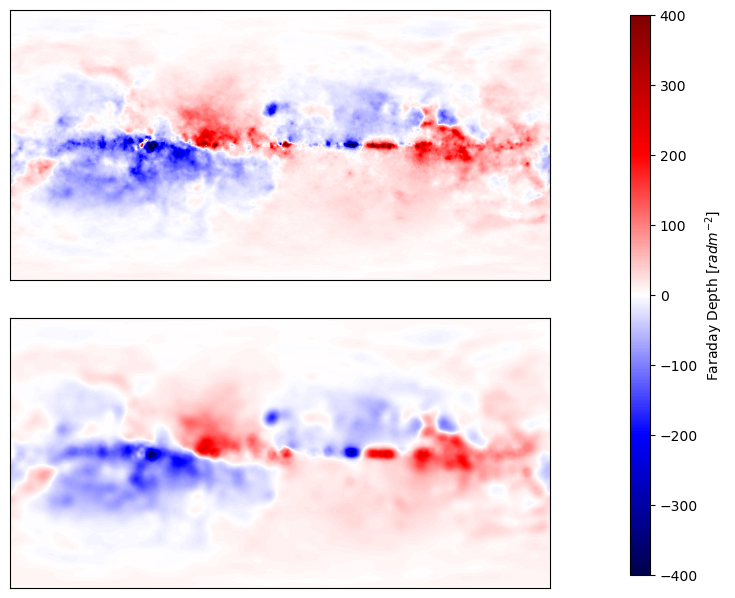

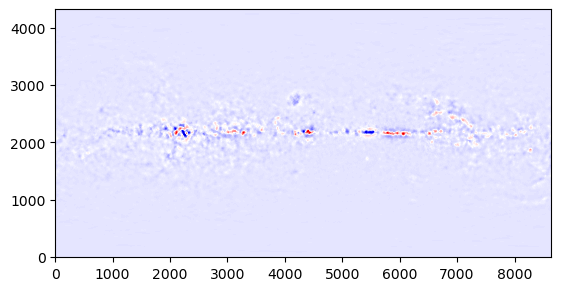

In [29]:
colormap = plt.colormaps["seismic"]

fig = plt.figure(figsize=(8, 8))
plt.tight_layout()
plt.subplot(2, 1, 1)
#plt.title("Interpolation")
plt.imshow(collated_data["interpolation"]["interpolation"].data, cmap=colormap, origin='lower')
plt.xticks([])
plt.yticks([])
plt.clim(-400,400)

plt.subplot(2, 1, 2)
#plt.title("Annulus-Bandpassed interpolation")
image = plt.imshow(corrected_annulus, cmap=colormap, origin='lower')
plt.xticks([])
plt.yticks([])
plt.clim(-400,400)

#plt.subplot(3, 1, 3)
#plt.title("Annulus-Bandpassed interpolation")
#image = plt.imshow(collated_data["interpolation"]["interpolation"].data-corrected_annulus, cmap=colormap, origin='lower')
#plt.xticks([])
#plt.yticks([])
#plt.clim(-400,400)

#plt.tight_layout()


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.9, 0.15, 0.025, 0.7])
fig.colorbar(image, cax=cbar_ax, label=r"Faraday Depth [$rad m^{-2}$]")

plt.subplots_adjust(hspace=0, wspace=0)


plt.show()

plt.imshow(collated_data["interpolation"]["interpolation"].data-corrected_annulus, cmap=colormap, origin='lower')
plt.show()

In [1]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator, hvc_snapshot as snap, collation_tools as ct
import matplotlib.pyplot as plt

collated_data = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits", crosshatch=False)

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


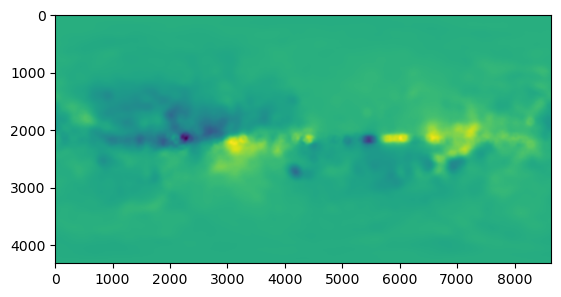

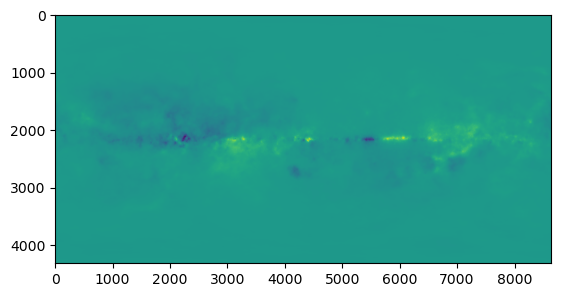

In [3]:
plt.imshow(collated_data["interpolation"]["corrected"].data)
plt.show()
plt.imshow(collated_data["interpolation"]["interpolation"].data)
plt.show()

In [4]:
RMs = ct.add_interpolations(collated_data["RMs"], collated_data["interpolation"]['interpolation'], collated_data["interpolation"]['corrected'], collated_data["interpolation"]['error'], collated_data["interpolation"]['corrected_err'], "../data_processed/proc_rms_annulus", overwrite=True)

=== COLLATING INTERPOLATION ===
Calculating interpolations
Adding interpolations
Saving RMs to ../data_processed/proc_rms_annulus
Process complete


# Craig's Annulus Method

## Uploading the Data

In [ ]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import file_find as ff
import matplotlib.pyplot as plt

#ff.get_RMs(disable_modifications=True)
RMs = ff.get_RMs(file='../data_catalog/combined_main_table')#, disable_modifications=True)

Converting coordinates


In [ ]:
import astropy.units as u

RMs.rename_column("rm_corrected", "interpolation_cor")
RMs['interpolation_cor'].unit = u.rad / (u.m ** 2)

new_col = RMs["RM_uncert"] * 1.02

RMs.add_column(new_col, name="interpolation_cor_unc")
RMs['interpolation_cor_unc'].unit = u.rad / (u.m ** 2)

RMs

ra_dec_obj,ra_dec_deg,RM,RM_uncert,pol_int,pol_int_uncert,ra_dec_pix_offsets,interpolation_cor,rm_correction,interpolation_cor_unc
"deg,deg",,rad / m2,rad / m2,,,,rad / m2,,rad / m2
SkyCoord,float64[2],float64,float64,float64,float64,float64[2],float64,float64,float64
"36.18009937350521,-7.54383365916963",36.18009937350521 .. -7.54383365916963,21.9816310322474,0.9131268920542513,0.000519405275390593,2.460415404132771e-05,-2553.735351562 .. -3235.471679688,27.02694220304052,-3.5394743447926884,0.9313894298953364
"38.94248200281266,-9.80197421372046",38.94248200281266 .. -9.80197421372046,19.48712906808216,1.1940067746571188,0.0003435758374468462,2.1954148646729718e-05,2360.806152344 .. 827.904296875,7.625286243098433,11.679512208474577,1.2178869101502612
"35.57413127820466,-10.621032748029563",35.57413127820466 .. -10.621032748029563,17.530773141275017,2.0400046525405444,0.00021916007436825527,2.5028186391122678e-05,-3603.44921875 .. 2307.988525391,-5.286765917273399,19.938968799170944,2.0808047455913554
"35.577438097174,-10.624189415075913",35.577438097174 .. -10.624189415075913,19.101186415699406,2.1839264389980033,0.000220997286962012,2.506927339456604e-05,-3597.565429688 .. 2313.635253906,6.35312192374257,19.938968799170944,2.2276049677779635
"38.16022862306473,-9.144247883170944",38.16022862306473 .. -9.144247883170944,7.307314775643481,0.945942408450594,0.0004483160669074908,2.2362628027402564e-05,975.3666992188 .. -359.6860351562,0.3283982041617337,6.324836885696204,0.9648612566196059
"40.104034474628556,-9.818710440384134",40.104034474628556 .. -9.818710440384134,3.0978156855686936,2.1964223010621775,0.0002499127152171144,2.9076331509998015e-05,4419.674560547 .. 869.185546875,-5.783248993759429,9.163089777787928,2.240350747083421
"40.12219618051354,-9.737779740828222",40.12219618051354 .. -9.737779740828222,6.891330349918209,0.10549480031294078,0.005355253184966231,2.918117042370114e-05,4452.939697266 .. 723.7465820312,-1.9122342381693613,8.988608060601493,0.1076046963191996
"40.11886591058514,-9.735717734233159",40.11886591058514 .. -9.735717734233159,7.684135001038004,0.0932108700489963,0.0058203986224081945,2.9116475285630463e-05,4447.064697266 .. 719.9931640625,-1.1930834033957876,8.988608060601493,0.09507508744997623


In [ ]:
from collation import collation_tools as ct

#ct.write_processed(RMs, "../data_processed/proc_rms_craig_annulus")

In [ ]:
from matplotlib import pyplot as plt

import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator, hvc_snapshot as snap, collation_tools as ct

collated_data = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms_craig_annulus","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits", crosshatch=False)

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


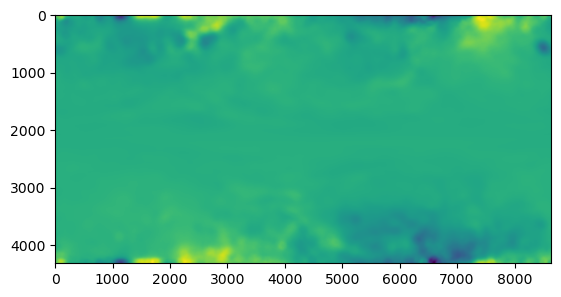

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(collated_data["interpolation"]["corrected"].data.real)
plt.show()

In [ ]:
RMs = ct.add_interpolations(collated_data["RMs"], interpolation_pre=collated_data["interpolation"]['interpolation'], interpolation_std=collated_data["interpolation"]['error'], save_file="../data_processed/proc_rms_craig_annulus")

RMs

=== COLLATING INTERPOLATION ===
Calculating interpolations
Adding interpolations
Saving RMs to ../data_processed/proc_rms_craig_annulus
Process complete


ra_dec_obj,ra_dec_deg,RM,RM_uncert,pol_int,pol_int_uncert,ra_dec_pix_offsets,interpolation_cor,rm_correction,interpolation_cor_unc,HI,HI [Error],interpolation_raw,interpolation_unc
"deg,deg",,rad / m2,rad / m2,,,,rad / m2,,rad / m2,dex(1 / cm2),dex(1 / cm2),rad / m2,rad / m2
SkyCoord,float64[2],float64,float64,float64,float64,float64[2],float64,float64,float64,float64,float64,float64,float64
"36.18009937350521,-7.54383365916963",36.18009937350521 .. -7.54383365916963,21.9816310322474,0.9131268920542513,0.000519405275390593,2.460415404132771e-05,-2553.735351562 .. -3235.471679688,27.02694220304052,-3.5394743447926884,0.9313894298953364,0.0,0.0,6.614419260301809,3.955372143717379
"38.94248200281266,-9.80197421372046",38.94248200281266 .. -9.80197421372046,19.48712906808216,1.1940067746571188,0.0003435758374468462,2.1954148646729718e-05,2360.806152344 .. 827.904296875,7.625286243098433,11.679512208474577,1.2178869101502612,0.0,0.0,12.417557752786923,4.155503764634133
"35.57413127820466,-10.621032748029563",35.57413127820466 .. -10.621032748029563,17.530773141275017,2.0400046525405444,0.00021916007436825527,2.5028186391122678e-05,-3603.44921875 .. 2307.988525391,-5.286765917273399,19.938968799170944,2.0808047455913554,0.0,0.0,12.761029775917189,4.088707048492656
"35.577438097174,-10.624189415075913",35.577438097174 .. -10.624189415075913,19.101186415699406,2.1839264389980033,0.000220997286962012,2.506927339456604e-05,-3597.565429688 .. 2313.635253906,6.35312192374257,19.938968799170944,2.2276049677779635,0.0,0.0,12.761029775917189,4.088707048492656
"38.16022862306473,-9.144247883170944",38.16022862306473 .. -9.144247883170944,7.307314775643481,0.945942408450594,0.0004483160669074908,2.2362628027402564e-05,975.3666992188 .. -359.6860351562,0.3283982041617337,6.324836885696204,0.9648612566196059,0.0,0.0,11.111412083545636,3.970368500387226
"40.104034474628556,-9.818710440384134",40.104034474628556 .. -9.818710440384134,3.0978156855686936,2.1964223010621775,0.0002499127152171144,2.9076331509998015e-05,4419.674560547 .. 869.185546875,-5.783248993759429,9.163089777787928,2.240350747083421,0.0,0.0,10.849447991243743,4.35247799680098
"40.12219618051354,-9.737779740828222",40.12219618051354 .. -9.737779740828222,6.891330349918209,0.10549480031294078,0.005355253184966231,2.918117042370114e-05,4452.939697266 .. 723.7465820312,-1.9122342381693613,8.988608060601493,0.1076046963191996,0.0,0.0,10.489293414529792,4.304179969306775
"40.11886591058514,-9.735717734233159",40.11886591058514 .. -9.735717734233159,7.684135001038004,0.0932108700489963,0.0058203986224081945,2.9116475285630463e-05,4447.064697266 .. 719.9931640625,-1.1930834033957876,8.988608060601493,0.09507508744997623,0.0,0.0,10.489293414529792,4.304179969306775
